In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('diabet_data.csv')

In [2]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insu,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
data.shape

(768, 9)

In [6]:
X = data.drop('class',axis=1)
y = data['class']

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [12]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [15]:
mlp.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

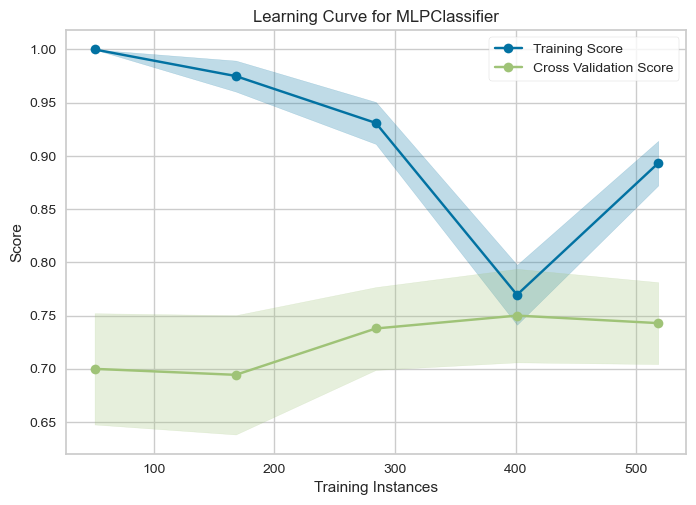

<Axes: title={'center': 'Learning Curve for MLPClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [16]:
from yellowbrick.model_selection import ValidationCurve, LearningCurve
learning_curve = LearningCurve(mlp, cv=10)


# Fit the model on the training data
learning_curve.fit(X_train, y_train)

# Plot the learning curve
learning_curve.show()

In [17]:
predictions = mlp.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,predictions))

[[97 25]
 [28 42]]


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       122
           1       0.63      0.60      0.61        70

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



In [28]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score,validation_curve, GridSearchCV

param_range = np.arange(1, 10, 1)
#print(param_range)
train_scores, test_scores = validation_curve( MLPClassifier(random_state=0), X_train, y_train, param_name="mlp", param_range=param_range, cv=10)
plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve SVM')
plt.xlabel('Value of C')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

ValueError: Invalid parameter 'mlp' for estimator MLPClassifier(random_state=0). Valid parameters are: ['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

In [21]:
len(mlp.coefs_)

4

In [22]:
len(mlp.coefs_[0])

8

In [23]:
len(mlp.intercepts_[0])

13